In [10]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from llmlegalassistant.utils import get_dataset_dir

def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Configurations')

metrics_dir = os.path.join(get_dataset_dir(), "metrics")
retrievers_dirs = os.listdir(metrics_dir)  # ['vector', 'bm25', 'fusion']
print(retrievers_dirs)

vector_metrics_file = os.listdir(os.path.join(metrics_dir, retrievers_dirs[0]))  # ['bert_responses_Splitter_text_stella_emb_vector.jsonl', 'bert_responses_Splitter_sentence_stella_emb_vector.jsonl', 'bert_responses_Splitter_text_UAE_emb_vector.jsonl', 'bert_responses_Splitter_semantic_UAE_emb_vector.jsonl', 'bert_responses_Splitter_semantic_stella_emb_vector.jsonl', 'bert_responses_Splitter_Recursive_stella_emb_vector.jsonl', 'bert_responses_Splitter_Recursive_UAE_emb_vector.jsonl', 'bert_responses_Splitter_sentence_UAE_emb_vector.jsonl']
bert_metrics_file = os.listdir(os.path.join(metrics_dir, retrievers_dirs[1]))
bm25_metrics_file = os.listdir(os.path.join(metrics_dir, retrievers_dirs[2]))  # ['bert_responses_Splitter_semantic_stella_emb_bm25.jsonl', 'bert_responses_Splitter_text_bm25.jsonl', 'bert_responses_Splitter_Recursive_bm25.jsonl', 'bert_responses_Splitter_semantic_UAE_emb_bm25.jsonl', 'bert_responses_Splitter_sentence_bm25.jsonl']
fusion_metrics_file = os.listdir(os.path.join(metrics_dir, retrievers_dirs[3]))  # ['bert_responses_Splitter_semantic_UAE_emb_fusion.jsonl', 'bert_responses_Splitter_text_UAE_emb_fusion.jsonl', 'bert_responses_Splitter_semantic_stella_emb_fusion.jsonl']

['vector', 'gpt-score', 'bm25', 'fusion']


In [11]:
all_files = bert_metrics_file

In [12]:
print(all_files)

['LLMScore_semantic_stella_fusion.jsonl', 'LLMScore_UAE.jsonl', 'LLMScore_Recursive_bm25.jsonl']


In [14]:
vector_metrics = [json.load(open(os.path.join(metrics_dir, retrievers_dirs[0], file))) for file in vector_metrics_file]
bm25_metrics = [json.load(open(os.path.join(metrics_dir, retrievers_dirs[2], file))) for file in bm25_metrics_file]
fusion_metrics = [json.load(open(os.path.join(metrics_dir, retrievers_dirs[3], file))) for file in fusion_metrics_file]
bert_metrics = [json.load(open(os.path.join(metrics_dir, retrievers_dirs[1], file))) for file in bert_metrics_file]
print(vector_metrics)
print(bm25_metrics)
print(fusion_metrics)
print(bert_metrics)

[{'precision': [0.881415843963623, 0.8364876508712769, 0.834525465965271, 0.8940575122833252, 0.879062294960022, 0.8163169026374817, 0.9999998807907104, 0.8223605751991272, 0.8442044854164124, 0.8234536051750183, 0.8927403092384338, 0.8785758018493652, 0.9681563973426819, 0.8907885551452637, 0.9161933064460754, 0.8971647024154663, 0.8670403957366943, 0.8351222276687622, 0.836730420589447, 0.8242737054824829, 0.8379106521606445, 0.8602120876312256, 0.8552715182304382, 0.8173878788948059, 1.0, 0.9683559536933899, 0.8725581765174866, 0.9624513387680054, 0.9530020952224731, 0.9796960949897766, 0.8510257601737976, 0.8769345283508301, 0.8418881893157959, 0.875400722026825, 0.9086381793022156, 0.9271572232246399, 0.7854229211807251, 0.9706393480300903, 0.9422087073326111, 0.9575867652893066, 0.8685473203659058, 0.9909095168113708, 0.8484888672828674, 0.8743063807487488, 0.8899794220924377, 0.9321252107620239, 0.884760856628418, 0.8655338287353516, 0.9359305500984192, 0.8862077593803406], 'rec

In [18]:
vector_precisions = [config['precision'] for config in vector_metrics]
vector_recall = [config['recall'] for config in vector_metrics]
vector_f1 = [config['f1'] for config in vector_metrics]

bm25_precisions = [config['precision'] for config in bm25_metrics]
bm25_recall = [config['recall'] for config in bm25_metrics]
bm25_f1 = [config['f1'] for config in bm25_metrics]

fusion_precisions = [config['precision'] for config in fusion_metrics]
fusion_recall = [config['recall'] for config in fusion_metrics]
fusion_f1 = [config['f1'] for config in fusion_metrics]

bert_correct = [config['correctness_score'] for config in bert_metrics]
bert_faithful = [config['faithfulness_score'] for config in bert_metrics]
bert_relevant = [config['relevancy_score'] for config in bert_metrics]

In [20]:
correct = bert_correct
faithful = bert_faithful
relevant = bert_relevant

In [60]:
all_metrics = np.concatenate([correct, faithful, relevant], axis=0)

In [69]:
print(all_metrics.reshape(50, 3, 3))

[[['4.5' '2.5' '4.0']
  ['5.0' '4.0' '4.0']
  ['5.0' '4.0' '3.0']]

 [['2.0' '3.0' '4.5']
  ['5.0' '3.0' '3.5']
  ['3.0' '5.0' '2.0']]

 [['1.0' '3.0' '4.5']
  ['3.0' '5.0' '3.0']
  ['5.0' '4.0' '2.0']]

 [['5.0' '5.0' '5.0']
  ['4.0' '4.0' '3.0']
  ['4.0' '3.5' '4.5']]

 [['3.0' '5.0' '4.0']
  ['5.0' '2.0' '3.0']
  ['4.0' '5.0' '2.0']]

 [['5.0' '4.0' '3.0']
  ['2.0' '3.0' '2.0']
  ['4.0' '5.0' '2.0']]

 [['4.0' '4.0' '5.0']
  ['5.0' '5.0' '2.5']
  ['1.0' '4.0' '5.0']]

 [['2.0' '4.0' '3.0']
  ['2.5' '3.0' '4.0']
  ['4.0' '5.0' '3.0']]

 [['2.5' '3.0' '5.0']
  ['4.0' '1.0' '5.0']
  ['5.0' '5.0' '4.0']]

 [['4.0' '3.0' '4.0']
  ['3.5' '4.0' '3.0']
  ['5.0' '4.0' '5.0']]

 [['2.5' '4.0' '4.5']
  ['5.0' '2.0' '5.0']
  ['5.0' '3.0' '2.0']]

 [['4.0' '2.5' '3.0']
  ['5.0' '2.0' '2.0']
  ['2.5' '5.0' '5.0']]

 [['3.0' '4.0' '4.0']
  ['3.0' '3.0' '2.5']
  ['4.0' '3.0' '4.0']]

 [['2.5' '5.0' '4.0']
  ['4.0' '2.0' '2.5']
  ['2.0' '4.0' '3.5']]

 [['3.0' '3.0' '5.0']
  ['2.0' '3.0' '4.0']
  ['

In [33]:
num_approaches = all_metrics.shape[2]
num_metrics = all_metrics.shape[1]

UFuncTypeError: ufunc 'minimum' did not contain a loop with signature matching types (dtype('<U3'), dtype('<U3')) -> None

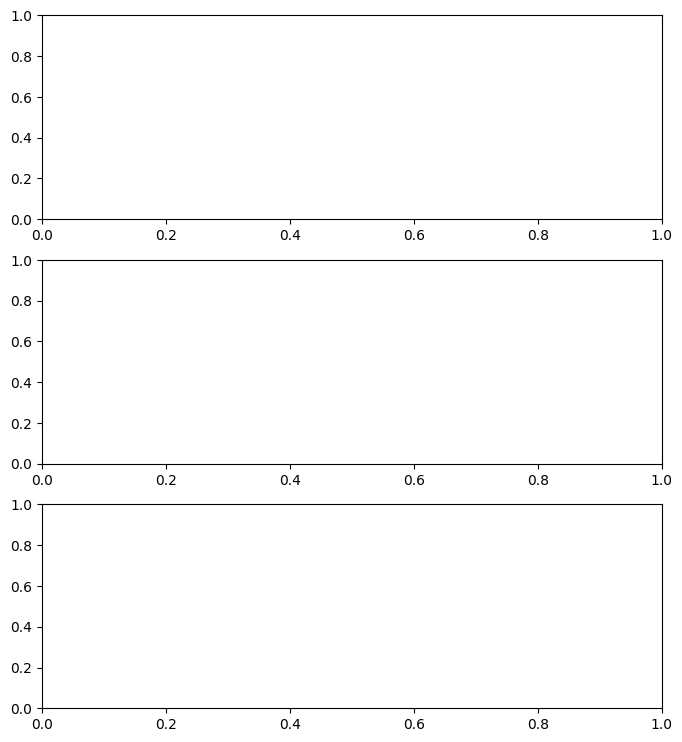

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Assuming all_metrics and all_files are defined earlier in your code

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 3*3))

metric_names = ["Precision", "Recall", "F1"]

for i in range(3): # Assuming 3 metrics are being plotted
    parts = ax[i].violinplot(all_metrics[i], showmeans=True, showmedians=False, showextrema=True, widths=0.8, vert=True)
    ax[i].set_title(f'{metric_names[i]}')
    ax[i].set_ylabel('Value')

    for k, pc in enumerate(parts['bodies']):
        if "bm25" in all_files[k]:
            pc.set_facecolor('green')
        elif "fusion" in all_files[k]:
            pc.set_facecolor('yellow')
        else: # vector
            pc.set_facecolor('blue')
        pc.set_edgecolor('black')
        pc.set_alpha(0.3)

    means = np.mean(all_metrics[:, :, I], axis=0)
    for k in range(len(means)):
        if "bm25" in all_files[k]:
            ax[i].scatter(k + 1, means[k], marker="s", color='green', s=50, zorder=4)
        elif "fusion" in all_files[k]:
            ax[i].scatter(k + 1, means[k], marker="o", color='yellow', s=50, zorder=4)
        else: # vector
            ax[i].scatter(k + 1, means[k], marker="^", color='blue', s=50, zorder=4)

    parts['cmeans'].set_alpha(0)
    parts['cmeans'].set_capstyle('round')
    parts['cbars'].set_color('black')
    parts['cmaxes'].set_color('black')
    parts['cmins'].set_color('black')

# Create legend handles
bm25_patch = mpatches.Patch(color='green', label='BM25Retriever')
fusion_patch = mpatches.Patch(color='yellow', label='QueryFusionRetriever')
vector_patch = mpatches.Patch(color='blue', label='VectorStoreRetriever')
bm25_patch_legend = mpatches.Patch(color='green', label='BM25Retriever')

# Add the legend to the last subplot
ax[-1].legend(handles=[bm25_patch, vector_patch, fusion_patch], loc='upper left', bbox_to_anchor=(1.05, 1))

# Create legend for the values on x-axis
config_labels = [f"{i+1} - Config{i+1}" for i in range(len(all_files))]
config_legend_labels = [f"Config {i+1}" for i in range(len(all_files))]

# Adjust the subplot layout to accommodate the legend
fig.subplots_adjust(right=0.75, wspace=0.2) # Adjust the right margin to make space for the legend

# Create a new axes for the legend
legend_ax = fig.add_axes([0.85, 0.35, 0.1, 0.7]) # Adjust the position as needed
legend_ax.axis('off') # Hide the legend axis

# Create a legend for the x-axis values
for i, config_label in enumerate(config_labels):
    legend_ax.text(0.5, 0.5*i / len(config_labels), str(i) + '-' + " ".join(all_files[i].split(".")[0].split("_")[3:5]), ha='right', va='top', color='black')

plt.tight_layout()
plt.show()
